In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import imageio

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

In [3]:
df = pd.read_csv("pose-output.csv")

In [5]:
for j in range(len(df)):
  for i in range(1, len(list(df.columns))):
    s = df[df.columns[i]][j]
    s = s[1:-2:]    #getting rid of the first and last element of the string
    s = s.split(",")  #converting the string into a list, separating the values by comma
    df[df.columns[i]][j] = s

#SaX-string



In [6]:
def make_sax_string(a):

  st = ""
  n = 4     #desired length of output string
  for i in range(n - 1):
    if float(a[int((i*len(a))/n)]) > 2*(float(min(a)) + float(max(a)))/3:
      st = st + 'h'
    elif float(a[int((i*len(a))/n)]) > (float(min(a)) + float(max(a)))/3:
      st = st + 'm'
    else:
      st = st + 'l'
  if float(a[-1]) > 2*(float(min(a)) + float(max(a)))/3:
    st = st + 'h'
  elif float(a[-1]) > (float(min(a)) + float(max(a)))/3:
    st = st + 'm'
  else:
    st = st + 'l'  

  return st

In [7]:
l = list(df.columns)
l = l[1:]
l

['xX_left_shoulder',
 'yY_left_shoulder',
 'zZ_left_shoulder',
 'xX_right_shoulder',
 'yY_right_shoulder',
 'zZ_right_shoulder',
 'xX_left_elbow',
 'yY_left_elbow',
 'zZ_left_elbow',
 'xX_right_elbow',
 'yY_right_elbow',
 'zZ_right_elbow',
 'xX_left_wrist',
 'yY_left_wrist',
 'zZ_left_wrist',
 'xX_right_wrist',
 'yY_right_wrist',
 'zZ_right_wrist',
 'xX_left_hip',
 'yY_left_hip',
 'zZ_left_hip',
 'xX_right_hip',
 'yY_right_hip',
 'zZ_right_hip',
 'xX_left_knee',
 'yY_left_knee',
 'zZ_left_knee',
 'xX_right_knee',
 'yY_right_knee',
 'zZ_right_knee',
 'xX_left_ankle',
 'yY_left_ankle',
 'zZ_left_ankle',
 'xX_right_ankle',
 'yY_right_ankle',
 'zZ_right_ankle',
 'left_shoulder__left_wrist',
 'right_wrist__left_wrist',
 'left_elbow__left_wrist',
 'right_elbow__right_wrist',
 'left_hip__left_ankle',
 'right_hip__right_ankle',
 'right_wrist__right_shoulder',
 'right_knee__left_knee',
 'right_ankle__left_ankle',
 'right_wrist__right_ankle',
 'left_wrist__left_ankle',
 'right_wrist__right_knee'

In [8]:
for i in range(len(df)):
  for j in l:
    df[j].iloc[i] = make_sax_string(list(df[j].iloc[i]))  

In [9]:
df.head()

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,xX_right_elbow,yY_right_elbow,zZ_right_elbow,xX_left_wrist,yY_left_wrist,zZ_left_wrist,xX_right_wrist,yY_right_wrist,zZ_right_wrist,xX_left_hip,yY_left_hip,zZ_left_hip,xX_right_hip,yY_right_hip,zZ_right_hip,xX_left_knee,yY_left_knee,zZ_left_knee,xX_right_knee,yY_right_knee,zZ_right_knee,xX_left_ankle,yY_left_ankle,zZ_left_ankle,xX_right_ankle,yY_right_ankle,zZ_right_ankle,left_shoulder__left_wrist,right_wrist__left_wrist,left_elbow__left_wrist,right_elbow__right_wrist,left_hip__left_ankle,right_hip__right_ankle,right_wrist__right_shoulder,right_knee__left_knee,right_ankle__left_ankle,right_wrist__right_ankle,left_wrist__left_ankle,right_wrist__right_knee,left_wrist__left_knee
0,Seated Jackknife,mmmm,mmmm,lhhh,mmmm,mmmm,lhhh,mmmm,mmmm,mhhh,mmmm,mmmm,lhhh,mmmm,mmmm,lhhh,mmmm,mmmm,hhhh,mmmm,mmmm,mmmm,mmmm,mmmm,hhhh,mmmm,mmmm,hhmh,mmmm,mmmm,hhhh,mmmm,mmmm,hlmm,mmmm,mmmm,hlll,mmmh,mmhm,mmmh,mmmm,mmmm,mmmm,mmmm,mmmm,mmmm,mmmm,hmml,mmmm,mmmh
1,hanging leg raises_4,mmmm,mmmh,hlmh,mmmm,mmmh,hlhh,hmhm,mhhh,hllh,mmmm,mhhh,hllh,mmhm,mhhh,hlll,hhhm,mhhh,llll,mmmm,mmmh,hlll,mmmm,mmmh,lhhh,mmmm,hmmh,llll,hmmm,hmmh,llll,mmmm,hmmh,hlll,mmmm,hmmh,llll,hhhh,hhhh,hhhh,hhhh,hhhh,hhhh,hhhh,hhhh,hhhh,hhmm,hmmm,hmlm,hlmh
2,lat pull-downs (3),mmmm,mhhm,lhlh,mmmm,mhhm,lhhl,mmmm,hhhm,lhhh,hmmh,mhhm,lhhl,mhhh,hhhh,lhhh,hmhh,hhhm,lhhl,mmmm,mmmm,hmlh,mmmm,mmmm,lhhl,mmmm,mmmm,hhmm,mmmm,mmmm,hhhl,mmmm,mmhh,hmmm,mmmm,mhhh,hhhl,mhhm,hhhh,mhhm,mhhm,hmmm,hmhm,mhhm,mhmh,hmmh,hmmm,hllm,hlmh,hllm
3,The Deadlift,mmmm,hhmh,llhl,mmmm,hhmh,llhl,mmmm,mmmm,llhl,mmmm,mmmm,llhl,mmmm,mmmm,hhhh,mmmm,mmmm,llhl,mmmm,mmmm,hlhh,mmmm,mmmm,lhll,mmmm,mmmm,llhl,mmmm,mmmm,llhl,mmmm,mmmm,llhh,mmmm,mmmm,llhl,mmmm,mmmm,mmmm,mmmm,hhhh,hhhh,mmmm,mmhm,mmhm,hhmh,hhmh,hhmh,hmmm
4,seated rows (4),hmhm,mmmm,hhhl,mmmm,mmmm,llll,hhhl,mmmh,hhhl,mmmm,mmmm,lhll,mmhm,mhhh,hhhl,mmmm,mmmm,hhhh,mmmm,mmmm,hhhm,mmmm,mmmm,lllh,mhmh,mmmm,hmhm,mmmm,mmmm,hhhm,mhmh,mmmm,hlhh,mmmm,mmmm,hhhh,mmmm,hhhm,mmmm,hhmm,hlhh,hhhh,mmmm,hmhl,hmhl,mmhh,mmmh,mmmh,hmmh


###Labels

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for j in l:
  df[j] = le.fit_transform(df[j])

In [11]:
df.head()

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,xX_right_elbow,yY_right_elbow,zZ_right_elbow,xX_left_wrist,yY_left_wrist,zZ_left_wrist,xX_right_wrist,yY_right_wrist,zZ_right_wrist,xX_left_hip,yY_left_hip,zZ_left_hip,xX_right_hip,yY_right_hip,zZ_right_hip,xX_left_knee,yY_left_knee,zZ_left_knee,xX_right_knee,yY_right_knee,zZ_right_knee,xX_left_ankle,yY_left_ankle,zZ_left_ankle,xX_right_ankle,yY_right_ankle,zZ_right_ankle,left_shoulder__left_wrist,right_wrist__left_wrist,left_elbow__left_wrist,right_elbow__right_wrist,left_hip__left_ankle,right_hip__right_ankle,right_wrist__right_shoulder,right_knee__left_knee,right_ankle__left_ankle,right_wrist__right_ankle,left_wrist__left_ankle,right_wrist__right_knee,left_wrist__left_knee
0,Seated Jackknife,18,24,18,23,23,21,19,20,25,22,23,22,24,30,19,24,30,0,14,13,33,18,16,0,20,18,5,19,20,0,21,19,16,23,20,10,21,26,24,27,22,21,26,24,27,22,14,26,26
1,hanging leg raises_4,18,23,12,23,22,8,8,13,9,22,16,12,22,23,10,2,23,25,14,12,11,18,15,21,20,10,28,12,10,27,21,11,13,23,12,27,0,0,0,0,0,0,0,0,0,5,15,15,9
2,lat pull-downs (3),18,18,20,23,17,22,19,1,17,12,17,23,17,0,19,10,2,19,14,13,16,18,16,22,20,18,6,19,20,1,21,17,24,23,14,1,16,0,19,21,14,8,20,19,17,14,8,10,8
3,The Deadlift,18,4,23,23,3,26,19,20,22,22,23,27,24,30,0,24,30,23,14,13,8,18,16,24,20,18,26,19,20,25,21,19,29,23,20,25,22,28,25,27,0,0,26,22,25,4,4,4,18
4,seated rows (4),7,24,1,23,23,28,1,19,1,22,23,25,22,23,1,24,30,0,14,13,2,18,16,27,15,18,15,19,20,2,16,19,9,23,20,0,22,2,25,7,6,0,26,11,12,19,23,25,17


###PCA

In [69]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
# Separating out the features
x = df.loc[:, l].values
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6'])
pca.explained_variance_ratio_

array([0.28193416, 0.0857546 , 0.07076707, 0.06191425, 0.05240263,
       0.04668166])

In [70]:
df_reduced_pca = principalDf[['Principal Component 1', 'Principal Component 2', 'Principal Component 3']]

In [71]:
df_reduced_pca.head()

,Principal Component 1,Principal Component 2,Principal Component 3
0,-44.399060,25.492690,-20.091909
1,22.010154,-6.377605,19.722432
2,1.637942,-2.318518,-23.919124
3,-20.086228,-4.846066,11.381321
4,-17.289582,-17.492474,-0.500996


In [72]:
y_pca = df_reduced_pca.loc[:, list(df_reduced_pca.columns)].values
print(type(y_pca))
print(y_pca.shape)

<class 'numpy.ndarray'>
(224, 3)


###t-SNE

In [107]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=0, perplexity=60, n_iter=300)

df_reduced_tsne = tsne.fit_transform(x)

df_reduced_tsne = pd.DataFrame(df_reduced_tsne) 

df_reduced_tsne.columns = ['T1', 'T2', 'T3']

print(df_reduced_tsne.head())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


          T1         T2         T3
0  12.478517  26.787979  11.144459
1   9.820291   5.421202  26.002491
2 -16.249313  13.304348 -16.451603
3  -1.809552  14.990663  19.960424
4  -3.587476  13.637746   5.236837


In [75]:
df_reduced_tsne.head()

,T1,T2,T3
0,85.950668,-16.839991,15.894375
1,-21.975782,28.415779,4.953326
2,4.509980,7.570921,39.497017
3,-9.453593,-27.554440,26.845343
4,-22.468700,-6.859191,-2.514187


###UMAP

In [108]:
import umap

Umap = umap.UMAP(random_state=42,n_components=4)

#x = df.loc[:, l].values
df_reduced_umap = Umap.fit_transform(x)
df_reduced_umap =pd.DataFrame(df_reduced_umap)

df_reduced_umap.columns = ['X1','X2', 'X3', 'X4']
print(df_reduced_umap.head())

         X1        X2        X3        X4
0  8.234025  2.239962  3.311457  3.085565
1  7.475118  2.070096  5.681257  6.333194
2  7.534274  2.401905  5.774426  4.344510
3  8.161247  3.460195  3.753899  4.244765
4  7.006559  3.826531  4.615193  3.950984


In [22]:
df_reduced_umap.head()

,X1,X2,X3,X4
0,8.234025,2.239962,3.311457,3.085565
1,7.475118,2.070096,5.681257,6.333194
2,7.534274,2.401905,5.774426,4.344510
3,8.161247,3.460195,3.753899,4.244765
4,7.006559,3.826531,4.615193,3.950984


Clustering



###K-means

In [109]:
import copy

def k_means_clustering(df_k, clusters, y):

  from sklearn.cluster import KMeans
  kmeans_classifier = KMeans(n_clusters = clusters)
  y_means = kmeans_classifier.fit_predict(y)
  df_new = copy.deepcopy(df_k)
  df_new["Cluster"] = y_means
  
  #Visual
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(df_new[list(df_new.columns)[0]], df_new[list(df_new.columns)[1]], df_new[list(df_new.columns)[2]], c = df_new['Cluster'])
  plt.show()
  return df_new

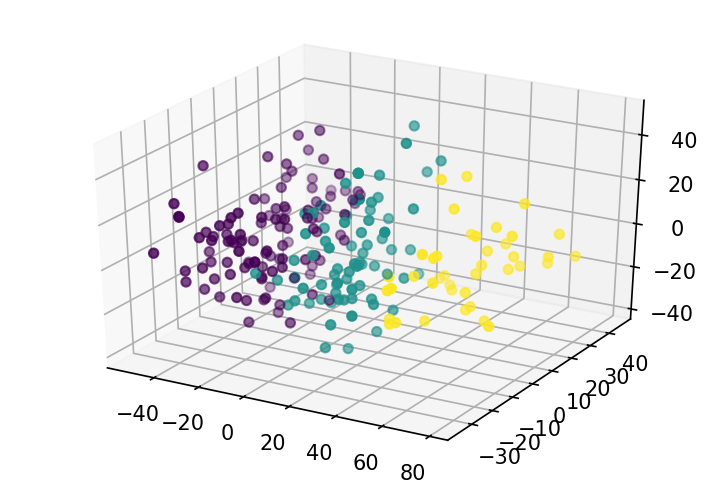

In [77]:
df_pca_kmeans = k_means_clustering(df_reduced_pca, 3, y_pca)

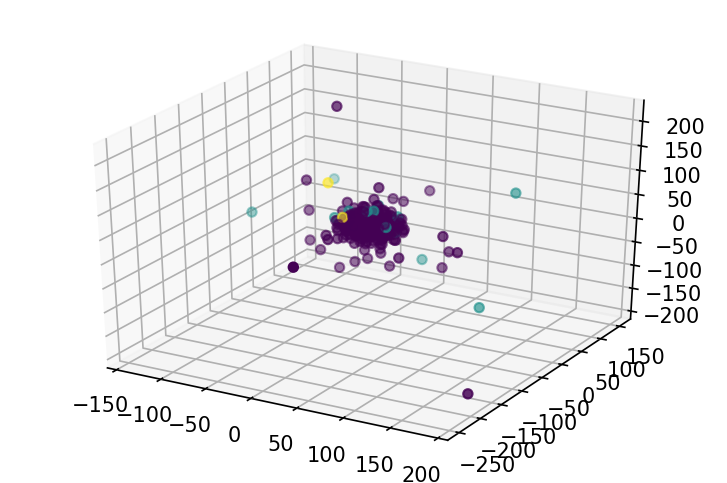

In [78]:
df_tsne_kmeans = k_means_clustering(df_reduced_tsne, 3, y_tsne)

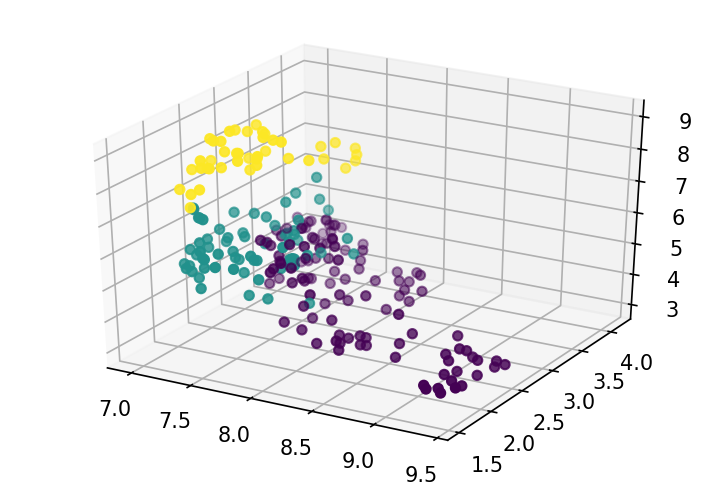

In [79]:
df_umap_kmeans = k_means_clustering(df_reduced_umap, 3, y_umap)

###Hierarchical

In [28]:
def hierarchical_clustering(df_h, clusters, y):

  #prints the dendogram
  import scipy.cluster.hierarchy as shc
  plt.figure(figsize=(10, 7))  
  plt.title("Dendrograms")  
  dend = shc.dendrogram(shc.linkage(df_h, method='ward'))
  plt.axhline(y=5, color='r', linestyle='--')

  from sklearn.cluster import AgglomerativeClustering
  cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')  
  df_newest = copy.deepcopy(df_h)
  df_newest["Cluster"] = cluster.fit_predict(y)

  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(df_newest[list(df_newest.columns)[0]], df_newest[list(df_newest.columns)[1]], df_newest[list(df_newest.columns)[2]], c = df_newest['Cluster'])
  plt.show()
  return df_newest

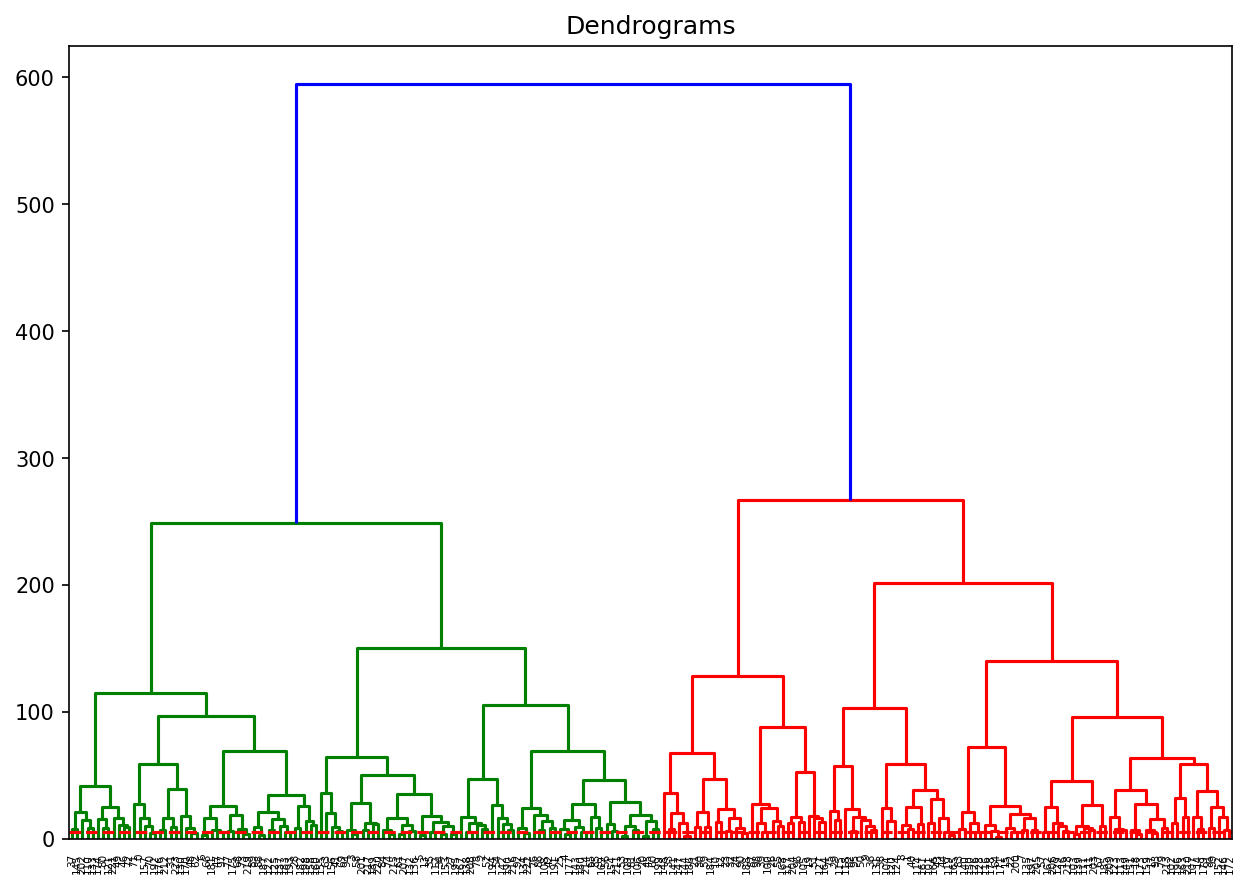

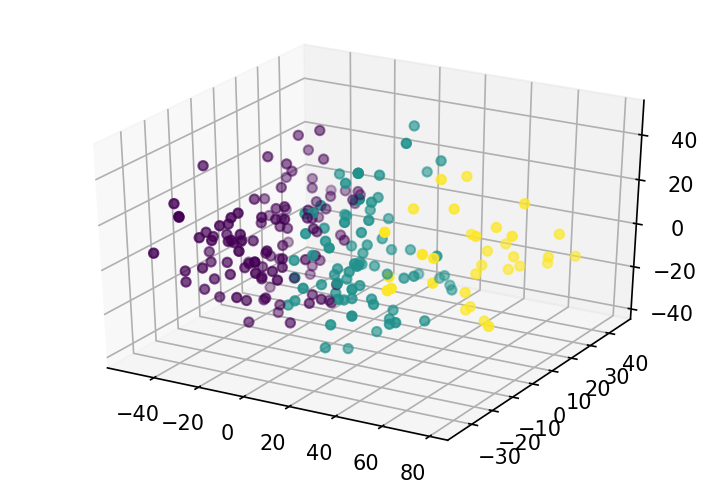

In [80]:
df_pca_hierarchy = hierarchical_clustering(df_reduced_pca, 3, y_pca)

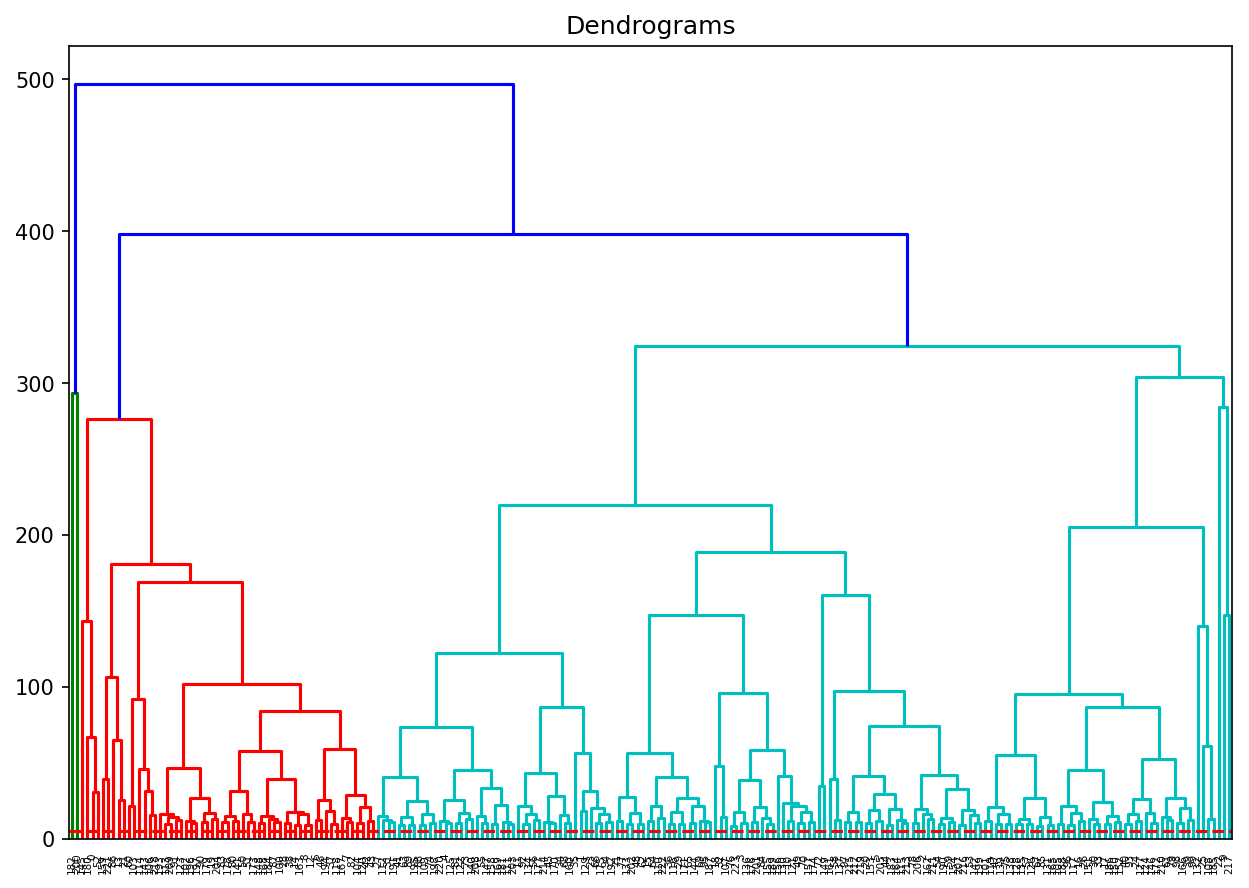

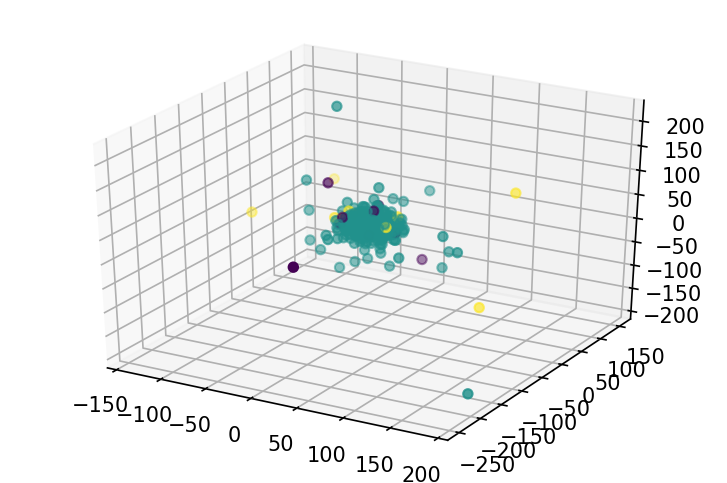

In [81]:
df_tsne_hierarchy = hierarchical_clustering(df_reduced_tsne, 3, y_tsne)

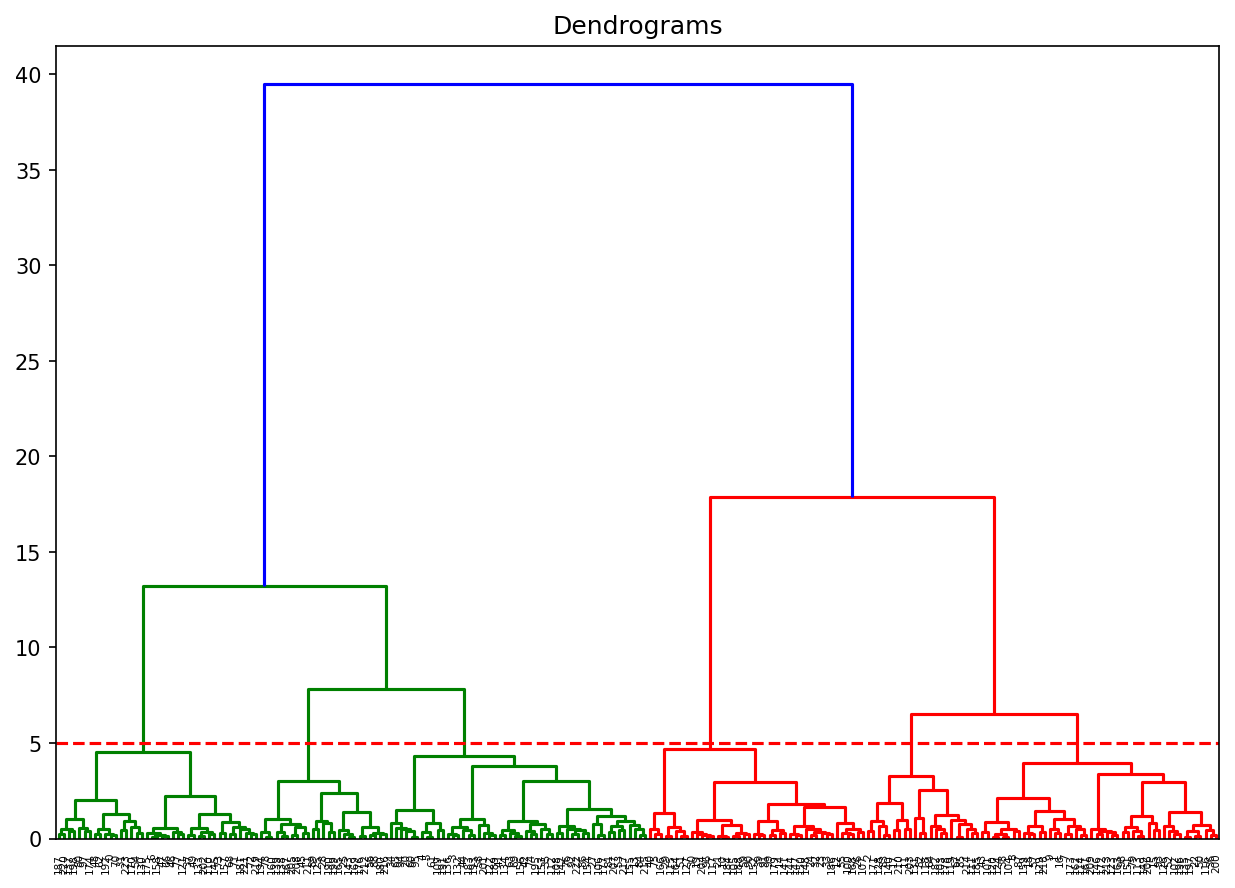

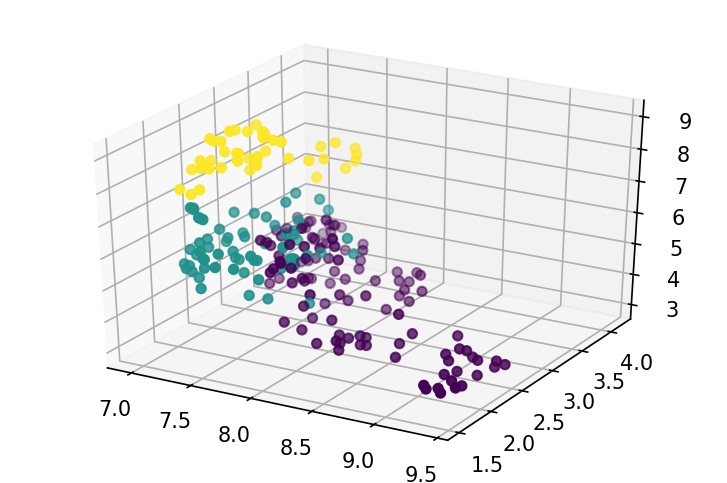

In [83]:
df_umap_hierarchy = hierarchical_clustering(df_reduced_umap, 3, y_umap)

###DBSCAN

In [84]:
def dbscan_clustering(df_d, ep = 0.2, minpts = 10):
  
  from sklearn.cluster import DBSCAN
  # Numpy array of all the cluster labels assigned to each data point
  db_default = DBSCAN(eps = ep, min_samples = minpts).fit(df_d)
  df_newest = copy.deepcopy(df_d)
  df_newest["Cluster"] = db_default.labels_

  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(df_newest[list(df_newest.columns)[0]], df_newest[list(df_newest.columns)[1]], df_newest[list(df_newest.columns)[2]], c = df_newest['Cluster'])
  plt.show()
  return df_newest

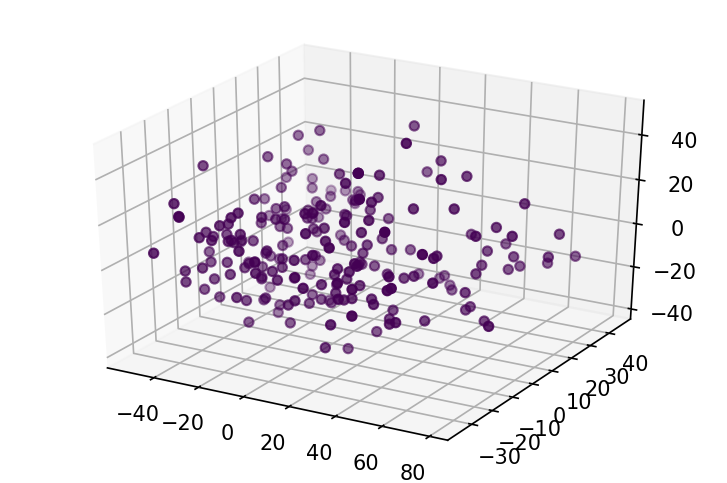

In [87]:
df_pca_dbscan = dbscan_clustering(df_reduced_pca, ep = 0.05, minpts = 20)

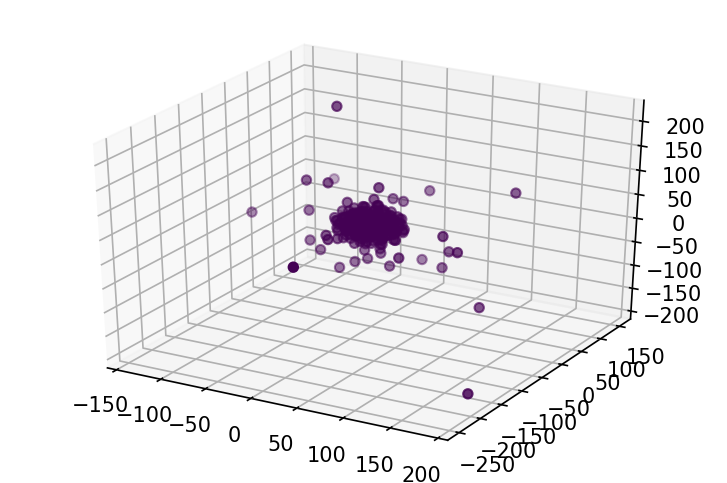

In [88]:
df_tsne_dbscan = dbscan_clustering(df_reduced_tsne)

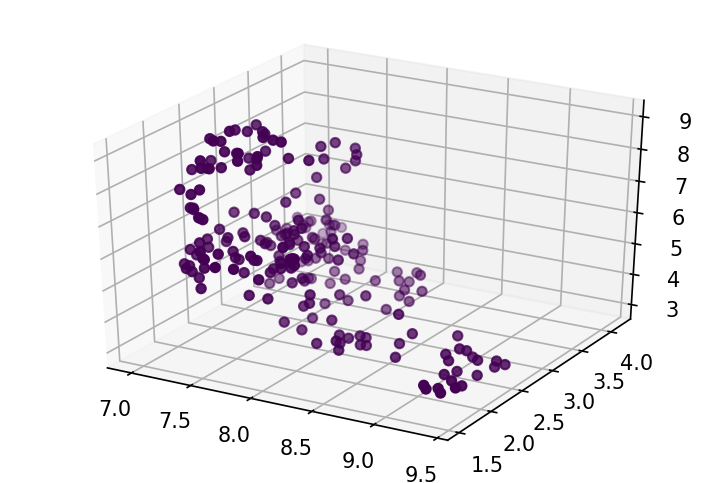

In [89]:
df_umap_dbscan = dbscan_clustering(df_reduced_umap, ep = 0.02, minpts=10)

###Fuzzy-c means

In [91]:
def fuzzy_c_clustering(df_d, clusters, y):

  from fcmeans import FCM
  fcm = FCM(n_clusters=clusters)
  fcm.fit(y)
  fcm_centers = fcm.centers
  fcm_labels = fcm.predict(y)
  df_newest = copy.deepcopy(df_d)
  df_newest["Clusters"] = fcm_labels
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(df_newest[list(df_newest.columns)[0]], df_newest[list(df_newest.columns)[1]], df_newest[list(df_newest.columns)[2]], c = df_newest['Clusters'])
  plt.show()
  return df_newest

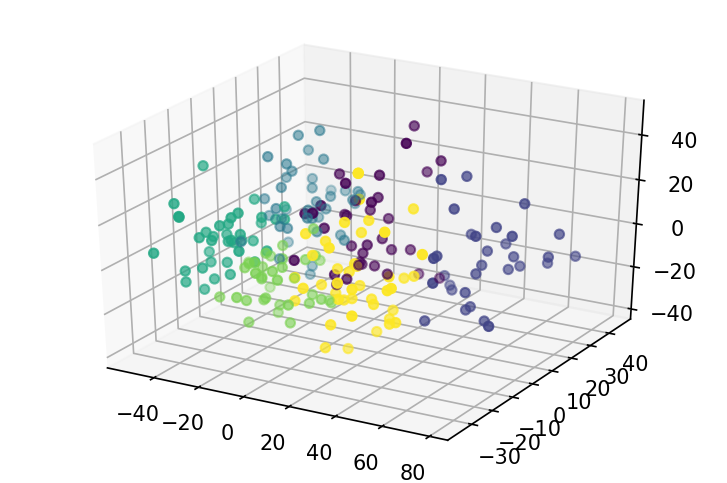

In [92]:
df_pca_fuzzy = fuzzy_c_clustering(df_reduced_pca, 6, y_pca)

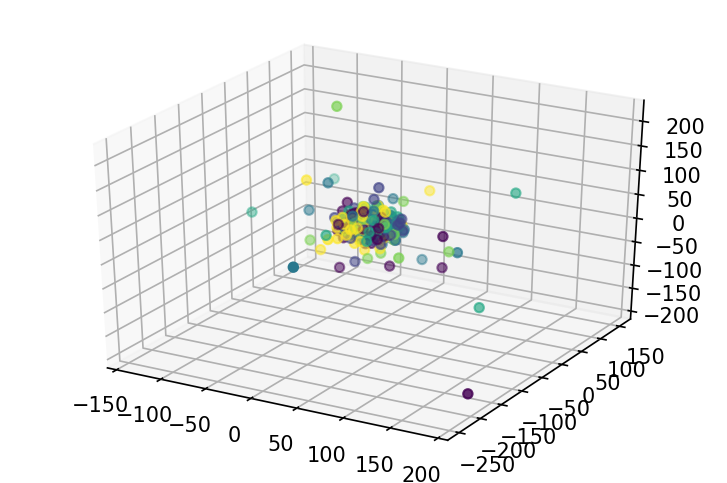

In [93]:
df_tsne_fuzzy = fuzzy_c_clustering(df_reduced_tsne, 6, y_tsne)

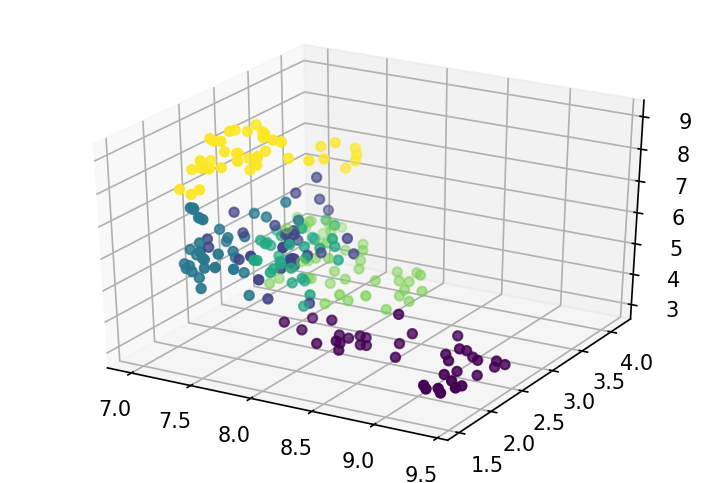

In [94]:
df_umap_fuzzy = fuzzy_c_clustering(df_reduced_umap, 6, y_umap)

###Choose the best clustering model

In [95]:
pdf = ["pec deck files (1)", "pec deck files (2)", "pec deck files (3)", "pec deck files (4)"]
pdf_idx = list()

deadlift = ["The Deadlift", "deadlifts (1)", "deadlifts (2)", "deadlifts (3)"]
deadlift_idx = list()

arnold = ["FEMALE Arnold Press", "Seated Arnold Press", "Arnold Press_2"]
arnold_idx = list()

squat = ["squats (1)", "squats (2)", "squats (3)", "squats (4)"]
squat_idx =list()


for i in range(len(df)):
  if df["name"].iloc[i] in deadlift:
    deadlift_idx.append(i)
  elif df["name"].iloc[i] in arnold:
    arnold_idx.append(i)
  elif df["name"].iloc[i] in squat:
    squat_idx.append(i)
  elif df["name"].iloc[i] in pdf:
    pdf_idx.append(i)
  
print(deadlift_idx, arnold_idx, squat_idx, pdf_idx)

[3, 7, 46, 47] [198, 203, 204] [111, 113, 114, 116] [106, 107, 108, 109]


In [96]:
print(list(df_pca_kmeans["Cluster"][deadlift_idx]))
print(list(df_pca_kmeans["Cluster"][squat_idx]))
print(list(df_pca_kmeans["Cluster"][arnold_idx]))
print(list(df_pca_kmeans["Cluster"][pdf_idx]))

[0, 1, 0, 0]
[1, 1, 1, 1]
[0, 1, 2]
[0, 2, 0, 0]


In [97]:
print(list(df_tsne_kmeans["Cluster"][deadlift_idx]))
print(list(df_tsne_kmeans["Cluster"][squat_idx]))
print(list(df_tsne_kmeans["Cluster"][arnold_idx]))
print(list(df_tsne_kmeans["Cluster"][pdf_idx]))

[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0]


In [98]:
print(list(df_umap_kmeans["Cluster"][deadlift_idx]))
print(list(df_umap_kmeans["Cluster"][squat_idx]))
print(list(df_umap_kmeans["Cluster"][arnold_idx]))
print(list(df_umap_kmeans["Cluster"][pdf_idx]))

[0, 1, 0, 0]
[1, 1, 1, 1]
[0, 1, 2]
[0, 2, 0, 0]


In [99]:
print(list(df_pca_hierarchy["Cluster"][deadlift_idx]))
print(list(df_pca_hierarchy["Cluster"][squat_idx]))
print(list(df_pca_hierarchy["Cluster"][arnold_idx]))
print(list(df_pca_hierarchy["Cluster"][pdf_idx]))

[0, 1, 0, 0]
[1, 1, 1, 1]
[0, 1, 2]
[0, 1, 0, 0]


In [100]:
print(list(df_tsne_hierarchy["Cluster"][deadlift_idx]))
print(list(df_tsne_hierarchy["Cluster"][squat_idx]))
print(list(df_tsne_hierarchy["Cluster"][arnold_idx]))
print(list(df_tsne_hierarchy["Cluster"][pdf_idx]))

[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1]
[1, 1, 1, 1]


In [101]:
print(list(df_umap_hierarchy["Cluster"][deadlift_idx]))
print(list(df_umap_hierarchy["Cluster"][squat_idx]))
print(list(df_umap_hierarchy["Cluster"][arnold_idx]))
print(list(df_umap_hierarchy["Cluster"][pdf_idx]))

[0, 1, 0, 0]
[1, 1, 1, 1]
[0, 1, 2]
[0, 2, 0, 0]


In [102]:
print(list(df_pca_dbscan["Cluster"][deadlift_idx]))
print(list(df_pca_dbscan["Cluster"][squat_idx]))
print(list(df_pca_dbscan["Cluster"][arnold_idx]))
print(list(df_pca_dbscan["Cluster"][pdf_idx]))

[-1, -1, -1, -1]
[-1, -1, -1, -1]
[-1, -1, -1]
[-1, -1, -1, -1]


In [103]:
print(list(df_tsne_dbscan["Cluster"][deadlift_idx]))
print(list(df_tsne_dbscan["Cluster"][squat_idx]))
print(list(df_tsne_dbscan["Cluster"][arnold_idx]))
print(list(df_tsne_dbscan["Cluster"][pdf_idx]))

[-1, -1, -1, -1]
[-1, -1, -1, -1]
[-1, -1, -1]
[-1, -1, -1, -1]


In [64]:
print(list(df_umap_dbscan["Cluster"][deadlift_idx]))
print(list(df_umap_dbscan["Cluster"][squat_idx]))
print(list(df_umap_dbscan["Cluster"][arnold_idx]))
print(list(df_umap_dbscan["Cluster"][pdf_idx]))

[-1, -1, -1, -1]
[-1, -1, -1, -1]
[-1, -1, -1]
[-1, -1, -1, -1]


In [104]:
print(list(df_pca_fuzzy["Clusters"][deadlift_idx]))
print(list(df_pca_fuzzy["Clusters"][squat_idx]))
print(list(df_pca_fuzzy["Clusters"][arnold_idx]))
print(list(df_pca_fuzzy["Clusters"][pdf_idx]))

[3, 0, 2, 2]
[0, 5, 5, 0]
[4, 5, 1]
[3, 1, 4, 4]


In [105]:
print(list(df_tsne_fuzzy["Clusters"][deadlift_idx]))
print(list(df_tsne_fuzzy["Clusters"][squat_idx]))
print(list(df_tsne_fuzzy["Clusters"][arnold_idx]))
print(list(df_tsne_fuzzy["Clusters"][pdf_idx]))

[4, 3, 0, 0]
[1, 2, 0, 1]
[5, 4, 2]
[1, 5, 2, 4]


In [106]:
print(list(df_umap_fuzzy["Clusters"][deadlift_idx]))
print(list(df_umap_fuzzy["Clusters"][squat_idx]))
print(list(df_umap_fuzzy["Clusters"][arnold_idx]))
print(list(df_umap_fuzzy["Clusters"][pdf_idx]))

[4, 2, 0, 0]
[1, 2, 2, 1]
[0, 1, 5]
[4, 5, 4, 3]
